In [15]:
pip install geopandas matplotlib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


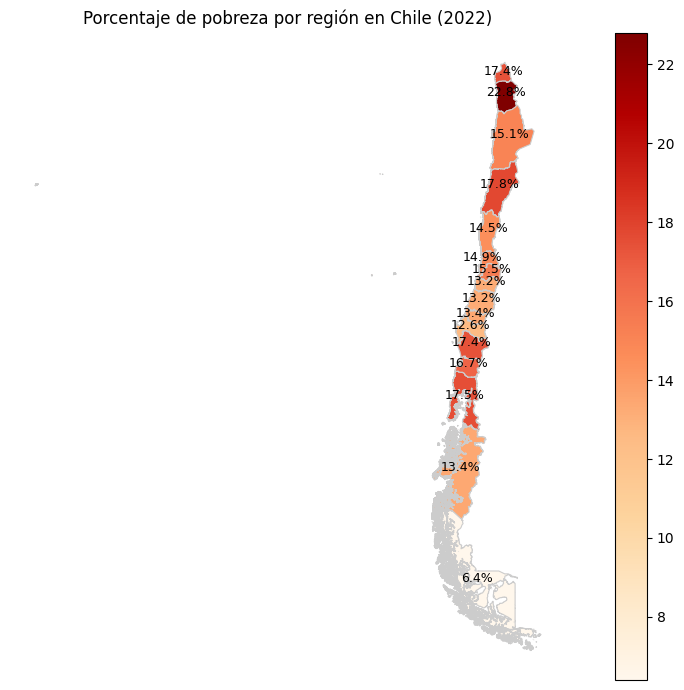

In [98]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf = gpd.read_file('Regional.shp')

gdf['Region'] = gdf['Region'].apply(lambda x: x.encode('latin1').decode('utf-8'))

valores_pobreza = {
    'Región de Arica y Parinacota': 17.4,
    'Región de Tarapacá': 22.8,
    'Región de Antofagasta': 15.1,
    'Región de Atacama': 17.8,
    'Región de Coquimbo': 14.5,
    'Región de Valparaíso': 14.9,
    'Región Metropolitana de Santiago': 15.5,
    "Región del Libertador Bernardo O'Higgins": 13.2,
    'Región del Maule': 13.2,
    'Región de Ñuble': 13.4,
    'Región del Bío-Bío': 12.6,
    'Región de La Araucanía': 17.4,
    'Región de Los Ríos': 16.7,
    'Región de Los Lagos': 17.5,
    'Región de Aysén del Gral.Ibañez del Campo': 13.4,
    'Región de Magallanes y Antártica Chilena': 6.4
}

gdf['pobreza'] = gdf['Region'].map(valores_pobreza)
faltantes = gdf[gdf['pobreza'].isna()]

gdf['coords'] = gdf['geometry'].centroid

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
gdf.plot(column='pobreza', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for idx, row in gdf.iterrows():
    if not pd.isna(row['pobreza']):
        plt.text(s=f"{row['pobreza']}%", 
                 x=row['coords'].x, 
                 y=row['coords'].y, 
                 horizontalalignment='center', 
                 fontsize=9, 
                 color='black')

ax.set_title('Porcentaje de pobreza por región en Chile (2022)')
ax.axis('off')
plt.tight_layout()
plt.show()
fig.savefig('mapa.png')